# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [111]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [113]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,612,80,34,42,110,57,3,114,59,17,119,131,191,121,87,4,7,179,183
1,519,88,39,76,155,62,8,137,48,18,137,156,281,124,63,3,6,201,209
2,264,103,49,100,194,60,10,185,35,22,160,202,518,178,62,13,8,198,208
3,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
4,462,97,47,81,183,64,8,168,39,20,150,193,426,182,70,11,2,192,198
5,750,96,40,78,170,58,7,174,38,21,139,197,455,160,68,3,29,191,200
6,142,106,49,107,194,57,11,214,31,24,161,224,670,172,67,0,39,192,206
7,183,84,35,53,122,57,4,116,59,17,123,135,196,128,76,10,27,183,190
8,701,108,49,103,200,62,10,206,32,23,155,227,635,215,72,6,16,189,198
9,474,82,40,73,141,57,8,153,44,19,133,173,342,153,75,11,9,181,187


Methods `describe` and `info` deliver some useful information.

In [114]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.666667,93.721311,44.828780,82.327869,169.544627,61.763206,8.535519,169.040073,40.794171,20.577413,147.912568,188.690346,440.697632,174.672131,72.224044,6.198543,12.520947,189.145719,195.817851
std,240.632303,8.008021,6.111779,15.385614,32.692891,7.695294,4.448931,32.739770,7.658036,2.553786,14.416751,30.384980,174.135172,31.953461,7.081827,4.765937,9.094898,6.239786,7.439511
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,218.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,151.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,438.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,624.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,197.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,261.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [115]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [116]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.fit_transform(X_test)

# show how the data set has chenged
X_train_pd = pd.DataFrame(X_train_scaled)
# First 15 rows of our dataset.
X_train_pd.head(15)

### the reasion for this transformation is that we our data woudnl't converge if we don't transform it with "Standard deviation"

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.775055,-1.715009,-1.773404,-2.623532,-1.822994,-0.619541,-1.245370,-1.682671,2.379518,-1.402105,-2.007313,-1.900378,-1.435238,-1.681229,2.088364,-0.461724,-0.607591,-1.627455,-1.724514
1,0.388221,-0.715099,-0.954566,-0.411660,-0.445292,0.030799,-0.120480,-0.979521,0.941808,-1.010172,-0.757627,-1.076853,-0.917926,-1.587257,-1.303683,-0.671738,-0.717643,1.901522,1.773527
2,-0.672454,1.159731,0.683111,1.149661,0.748716,-0.229337,0.329476,0.487923,-0.757303,0.557558,0.839194,0.438433,0.444326,0.104242,-1.445018,1.428399,-0.497539,1.420298,1.638987
3,1.648552,0.159822,-0.627030,-0.021330,0.013942,0.421004,0.104498,-0.734947,0.680406,-0.618240,-0.202211,-0.846266,-0.728246,-1.086072,-1.162348,-0.461724,-0.497539,1.580706,1.504447
4,0.151129,0.409799,0.355576,-0.086385,0.411944,0.290935,-0.120480,-0.031797,-0.234500,-0.226307,0.144924,0.141964,-0.084481,0.229539,-0.314336,1.008372,-1.157852,0.457850,0.293586
5,1.349067,0.284810,-0.790798,-0.281550,0.013942,-0.489473,-0.345458,0.151634,-0.365201,0.165625,-0.618773,0.273728,0.082209,-0.459591,-0.597006,-0.671738,1.813553,0.297442,0.562666
6,-1.179914,1.534697,0.683111,1.605047,0.748716,-0.619541,0.554454,1.374504,-1.280107,1.341423,0.908621,1.163136,1.318008,-0.083702,-0.738342,-1.301779,2.914074,0.457850,1.369907
7,-1.009374,-1.215054,-1.609637,-1.907926,-1.455607,-0.619541,-1.020392,-1.621528,2.379518,-1.402105,-1.729605,-1.768614,-1.406498,-1.461960,0.533676,0.798358,1.593449,-0.985823,-0.782734
8,1.145251,1.784675,0.683111,1.344827,0.932409,0.030799,0.329476,1.129930,-1.149406,0.949491,0.492059,1.261959,1.116831,1.263232,-0.031665,-0.041697,0.382877,-0.023375,0.293586
9,0.201043,-1.465031,-0.790798,-0.606825,-0.873910,-0.619541,-0.120480,-0.490373,0.419005,-0.618240,-1.035335,-0.516856,-0.567304,-0.678859,0.392341,1.008372,-0.387487,-1.306639,-1.186354


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

best_param =  {'C': 3.3770629943240693, 'penalty': 'l1'}
F1 score = :  0.7713858882158098
Accuracy = :  0.7744107744107744


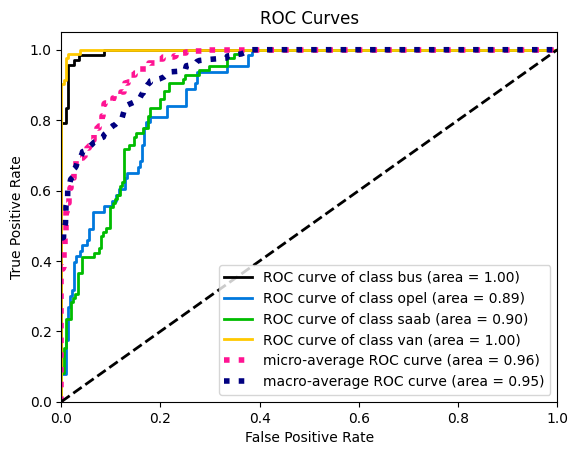

In [117]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import f1_score


logisticRegr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logisticRegr, distributions, random_state=0)
search = clf.fit(X_train_scaled, y_train)
print("best_param = ", search.best_params_)
y_predicted = clf.predict(X_test_scaled)
print("F1 score = : ", f1_score(y_test, y_predicted, average='macro'))
print("Accuracy = : ", clf.score(X_test_scaled, y_test))

predicted_proba = clf.predict_proba(X_test_scaled)
scikitplot.metrics.plot_roc(y_test, predicted_proba)
plt.show()


################################
# logisticRegr.fit(X_train_scaled, y_train)

# y_pred = logisticRegr.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, y_pred)*100
# confusion_mat = confusion_matrix(y_test, y_pred)

# print("Accuracy is",accuracy)
# print("Confusion Matrix")
# print(confusion_mat)

# # Plot ROC-curve
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}
# clf = GridSearchCV(logisticRegr, parameters, cv=5)
# clf.fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)
# plt.show()

In [118]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

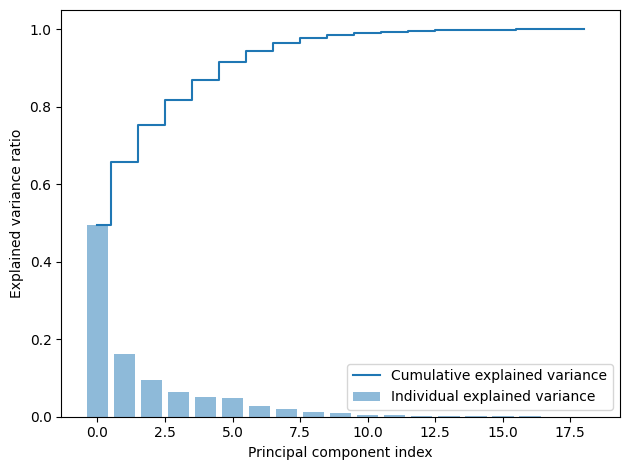

In [119]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

# pca = PCA()
# X_train = pca.fit_transform(X_train_scaled)
# X_test_scaled = pca.transform(X_test_scaled)
# explained_variance = pca.explained_variance_ratio_
# explained_variance

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [136]:
### YOUR CODE HERE
pca.fit(X_train_scaled)
X_train_scaled = pca.transform(X_train_scaled)

pca.fit(X_test_scaled)
X_test_scaled = pca.transform(X_test_scaled)

# as we can see in the graph the variance is practically 1 for 11 components
from sklearn.preprocessing import LabelEncoder

def encode(y):
    y_df = pd.DataFrame(y)
    le = LabelEncoder()
    le.fit(y_df[0])
    y_df[0] = le.transform(y_df[0])
    encoded_y = np.array(y_df[0])
    return encoded_y

pca = PCA(n_components=11)
projected_X_train = pca.fit_transform(X_train_scaled)
projected_X_test = pca.fit_transform(X_test_scaled)
encoded_y_train = encode(y_train)
encoded_y_test = encode(y_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Score: 0.7030025020850709
Best Hyperparameters: {'C': 3.402778639046591, 'penalty': 'l2'}
accuracy score is 0.45791245791245794
f1 score is [0.36708861 0.33333333 0.42553191 0.70198675]


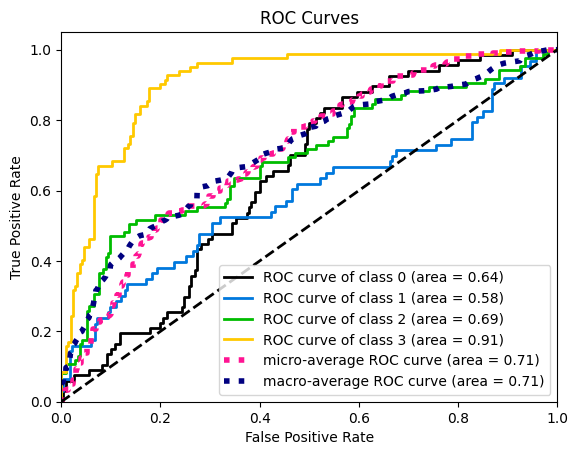

In [138]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt


# logisticRegr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
# param_grid = {'C': np.logspace(-4, 4, 20), 'l1_ratio': np.linspace(0, 1, 11), 'penalty' :['elasticnet']}
# clf = GridSearchCV(lr, param_grid, cv=5).fit(X_train_scaled, y_train)
# print("The best parameters are %s" % (clf.best_params_))
# y_predicted = clf.predict(X_test_scaled)
# print("F1 score of this model: ", f1_score(y_test, y_predicted, average='macro'))
# print("Accuracy score of this model: ", clf.score(X_test_scaled, y_test))


# predicted_proba = clf.predict_proba(X_test_scaled)
# scikitplot.metrics.plot_roc(y_test, predicted_proba)
# plt.show()


################################################################ method 2
def process(X_train, X_test, encoded_y_train):
    # execute search
    result = search.fit(X_train, encoded_y_train)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    #model.fit(X_train, encoded_y_train)
    #y_pred = model.predict(X_test)
    y_pred = result.predict(X_test)
    print('accuracy score is', accuracy_score(encoded_y_test, y_pred))
    print('f1 score is', f1_score(encoded_y_test, y_pred, average=None))
    # plot ROC curves
    y_probas = result.predict_proba(X_test)
    skplt.metrics.plot_roc(encoded_y_test, y_probas)
    plt.show()
process(projected_X_train, projected_X_test, encoded_y_train)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

The depth-13 tree achieves the best mean cross-validation accuracy 63.76314 +/- 3.32175% on training dataset


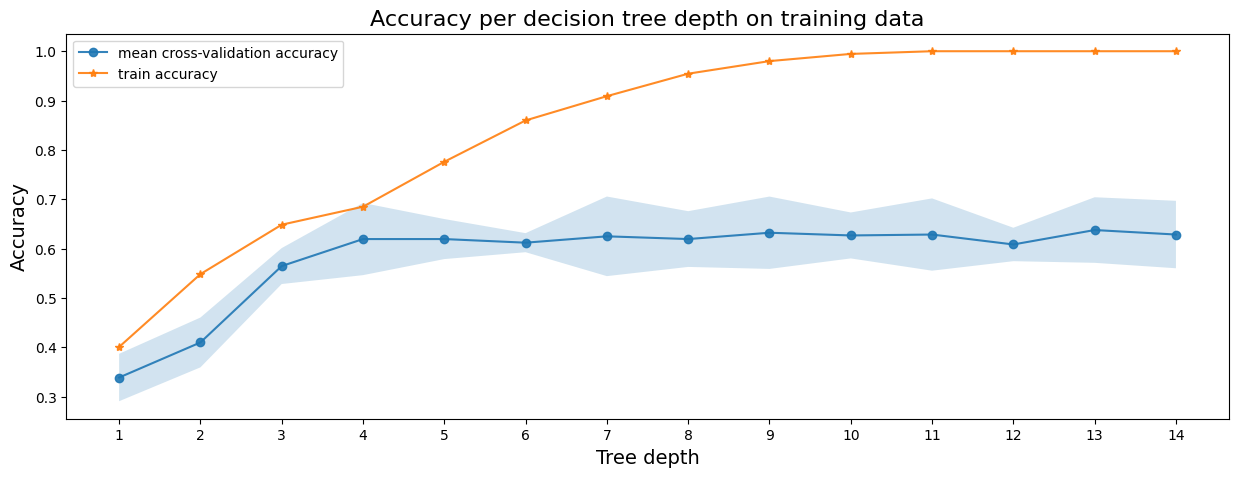

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#dtc = DecisionTreeClassifier()
#dtc.fit(projected_X_train, encoded_y_train)

tree_depths = range(1, 15)
cv_scores_list = []
cv_scores_std = []
cv_scores_mean = []
accuracy_scores = []
for depth in tree_depths:
    tree_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(
        tree_model,
        projected_X_train,
        encoded_y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_scores_list.append(cv_scores)
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())
    accuracy_scores.append(
        tree_model.fit(projected_X_train, encoded_y_train).score(projected_X_train, encoded_y_train)
    )

cv_scores_mean = np.array(cv_scores_mean)
cv_scores_std = np.array(cv_scores_std)
accuracy_scores = np.array(accuracy_scores)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(tree_depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
ax.fill_between(tree_depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)

ax.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
ax.set_title('Accuracy per decision tree depth on training data', fontsize=16)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

ax.set_xticks(tree_depths)
ax.legend()

idx_max = cv_scores_mean.argmax()
best_tree_depth = tree_depths[idx_max]
best_tree_cv_score = cv_scores_mean[idx_max]
best_tree_cv_score_std = cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

Single tree depth:  14
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  42.76094 %


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

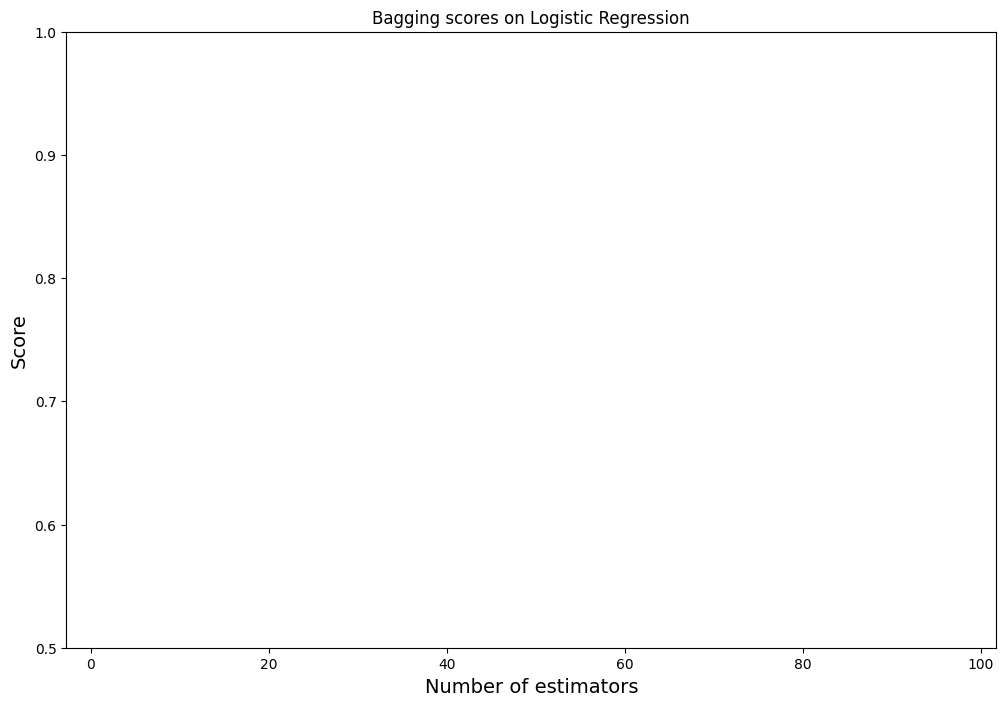

In [155]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

N = np.arange(2, 100, 5, dtype=np.int16) 
count = len(N)

accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')
for i in range(count):
    clf = BaggingClassifier(lr, n_estimators=N[i])
    clf.fit(X_train_scaled, y_train)
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

                            
plt.figure(figsize=(12, 8))
plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Logistic Regression")
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

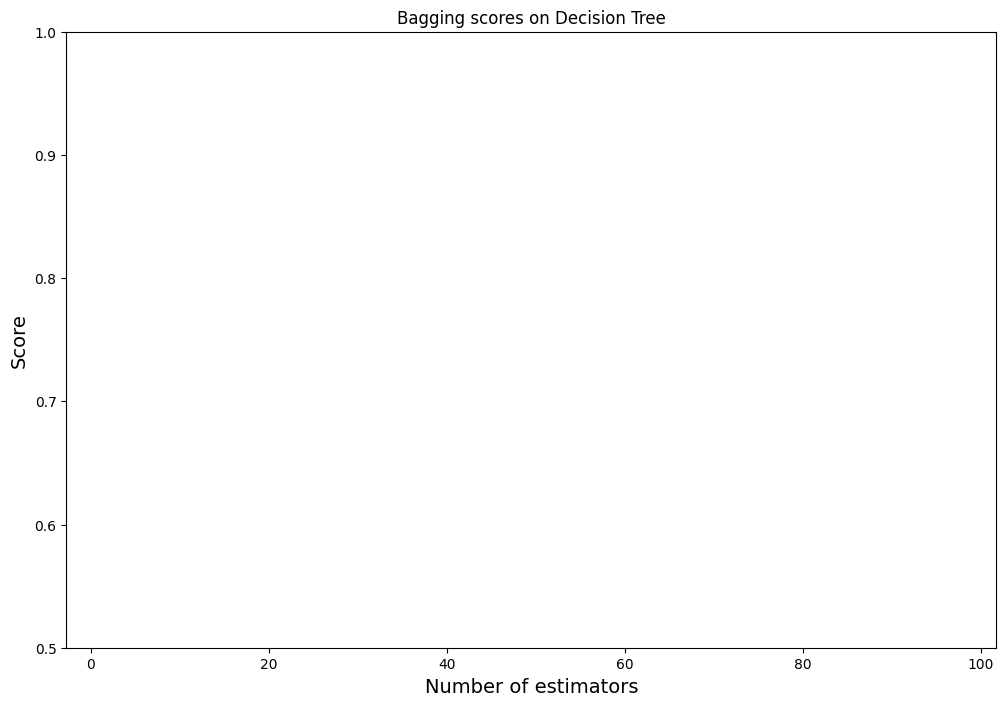

In [151]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
accuracy_score = np.zeros(count)
f1_test_score = np.zeros(count)

lr = DecisionTreeClassifier()
for i in range(count):
    clf = BaggingClassifier(lr, n_estimators=N[i])
    clf.fit(X_train_scaled, y_train)
    accuracy_score[i] = clf.score(X_test_scaled, y_test)
    y_predicted = clf.predict(X_test_scaled)
    f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

                            
plt.figure(figsize=(12, 8))
plt.xlabel("Number of estimators", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(N, accuracy_score, label='accuracy score')
plt.plot(N, f1_test_score, label='f1 score')
plt.ylim(0.5, 1)
plt.title("Bagging scores on Decision Tree")
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [162]:
def analyse(func):
    for i in range(10):
        data_size = int(X_train.shape[0] * (i + 1) / 10)
        clf = lr.fit(X_train_scaled[:data_size], y_train[:data_size])
        accuracy_score[i] = clf.score(X_test_scaled, y_test)
        y_predicted = clf.predict(X_test_scaled)
        f1_test_score[i] = f1_score(y_test, y_predicted, average='macro')

In [164]:
def plot(accuracy_score, f1_test_score):
    plt.figure(figsize=(12, 8))
    plt.xlabel("Data size", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.plot(np.arange(10), accuracy_score, label='accuracy score')
    plt.plot(np.arange(10), f1_test_score, label='f1 score')
    plt.ylim(0.5, 1)
    plt.title("Scores")
    plt.show()

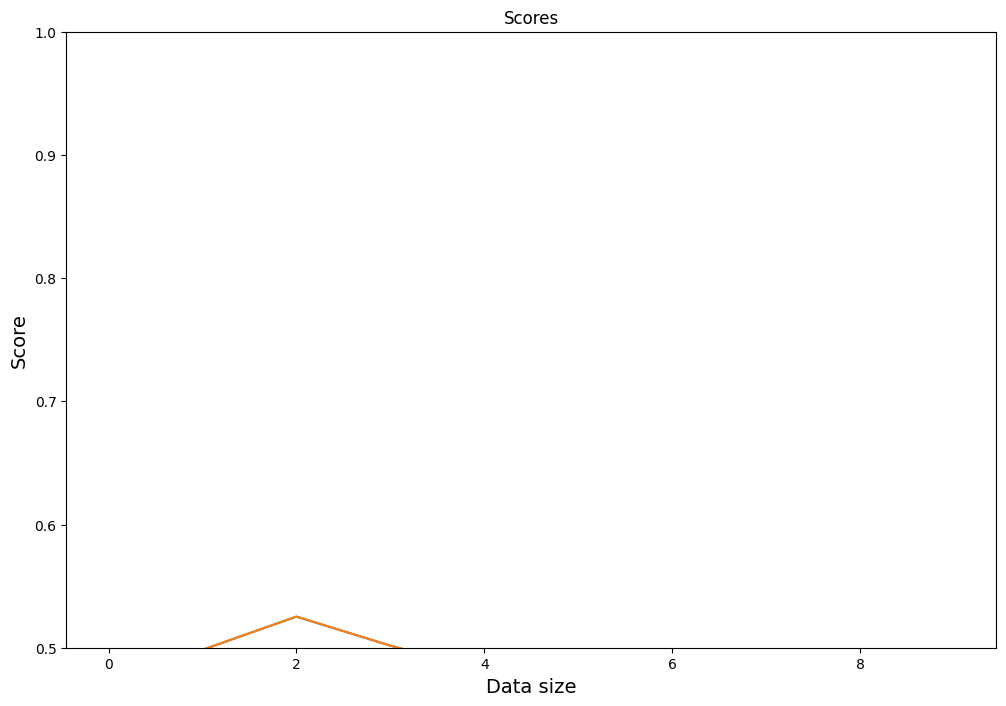

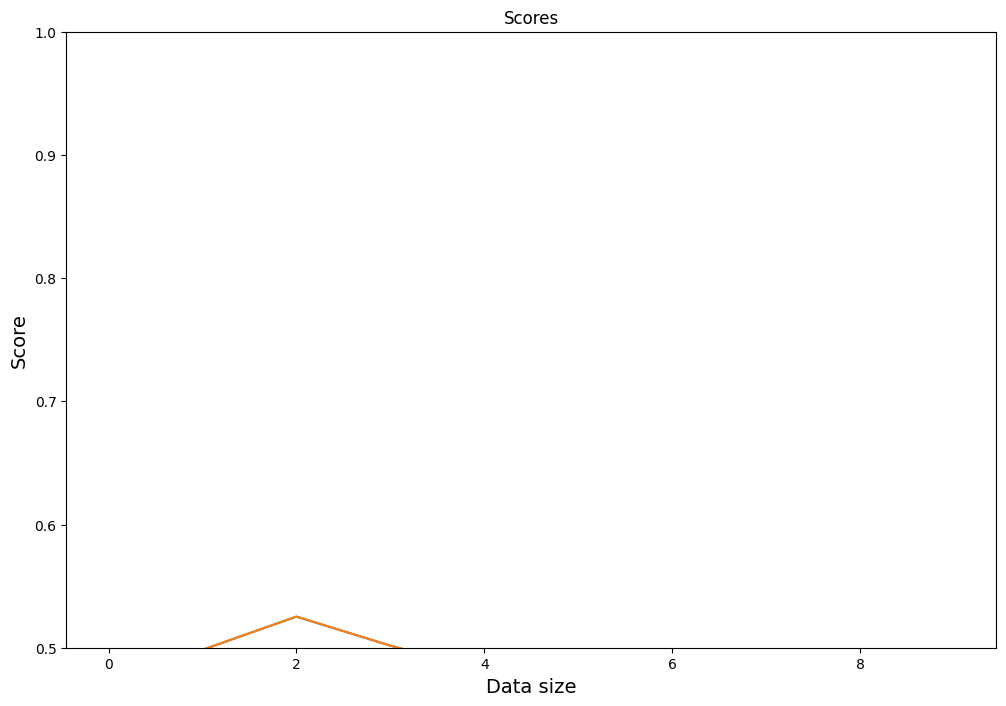

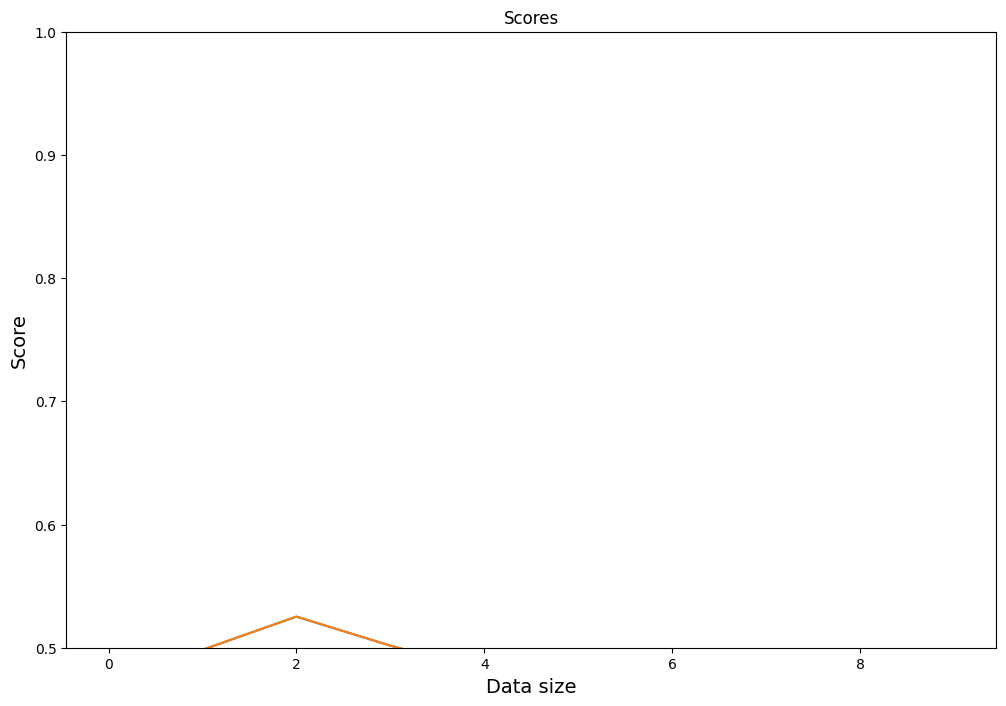

In [167]:
# YOUR CODE HERE
accuracy_score = np.zeros(10)
f1_test_score = np.zeros(10)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=0.6158, l1_ratio=0.9, penalty='elasticnet')
analyse(lr)
plot(accuracy_score, accuracy_score)

dtc = DecisionTreeClassifier()
analyse(dtc)
plot(accuracy_score, accuracy_score)

rfc = RandomForestClassifier(random_state=42)
analyse(rfc)
plot(accuracy_score, accuracy_score)
